In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.drop(["CostumerID"],axis=1,inplace=True)

In [6]:
df.dtypes
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


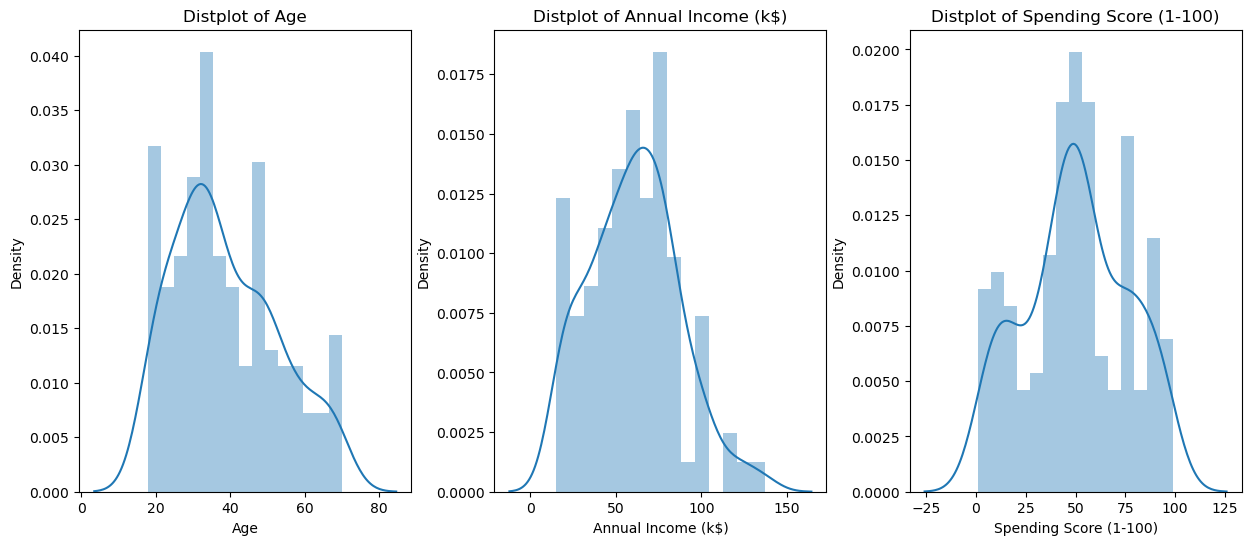

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.25 , wspace = 0.25)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

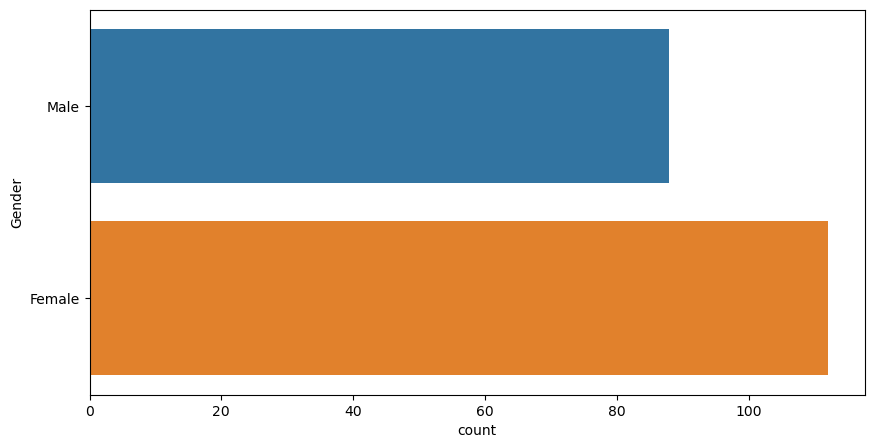

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(y='Gender',data=df)
plt.show()

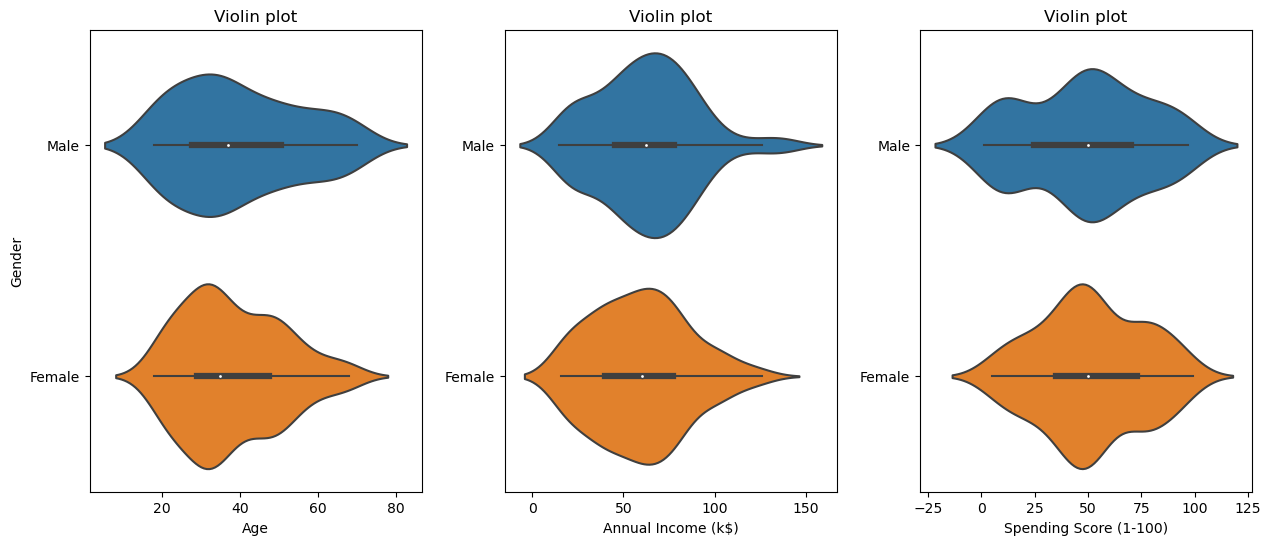

In [14]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x=cols,y='Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin plot')
plt.show()

In [19]:
x=df.iloc[:,[3,4]].values

In [22]:
from sklearn.cluster import KMeans


In [35]:
sse=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    

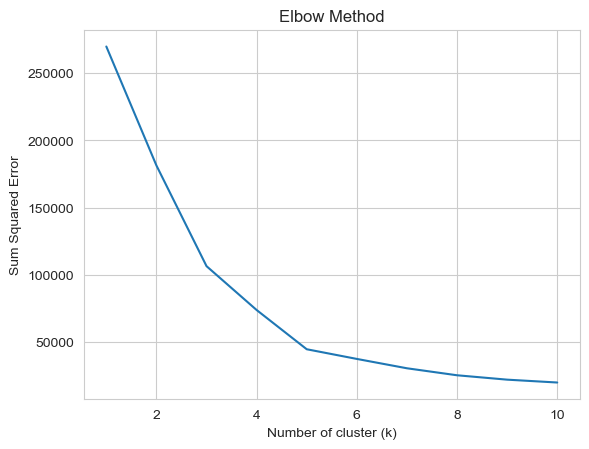

In [36]:

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=2)

In [38]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [87.        , 18.63157895],
       [44.15447154, 49.82926829]])

In [45]:
y_kmeans= kmeans.fit_predict(x)
y_kmeans.sort()
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

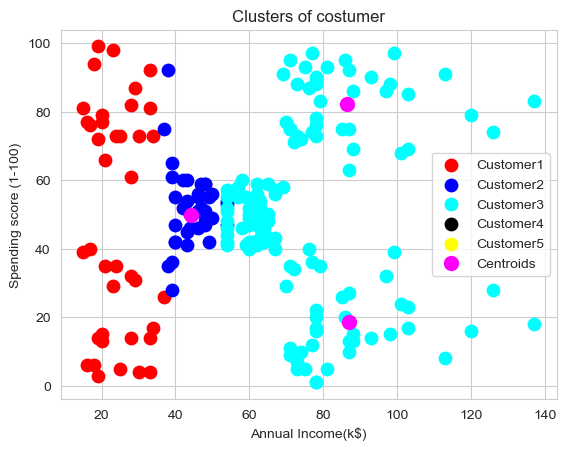

In [49]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80, c = 'red',label='Customer1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80, c = 'blue',label='Customer2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80, c = 'cyan',label='Customer3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80, c = 'black',label='Customer4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80, c = 'yellow',label='Customer5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c = 'magenta' , label='Centroids')
plt.title('Clusters of costumer')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()